# Titanic Disaster Survival Prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

### Data Collection & Processing

In [2]:
#load data from csv to Pandas Dataframe
titanic_data=pd.read_csv('titanic_train.csv')

In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling Missing Values

In [7]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis = 1)

In [8]:
# replacing the missing value in 'Age' column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [9]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode()[0])

S


In [10]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

In [11]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis and Data Visualization

In [12]:
# Statistical measure about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# number of people survived
# survival : 0 = No, 1 = Yes
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
# look at the percentage
titanic_data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

**Out of 891 only 38% survived** and rest all died.

In [15]:
# Survival based on Pclas
pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [16]:
titanic_data[['Pclass' , 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


So, there is **62.96% Survival chance for 1st Class**. This clearly shows us that First Class People were given priority first.

In [17]:
# survival based on Gender
pd.crosstab(titanic_data['Sex'], titanic_data['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [18]:
# To view percentage
pd.crosstab(titanic_data['Sex'], titanic_data['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


It seems that **Female Survival Probability (74%)** is almost thrice that of **Men (18%)** . Or we can say Females were more likely to Survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

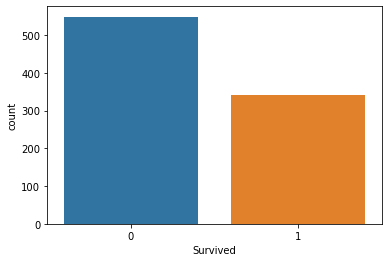

In [19]:
#countplot of 'Subrvived' column
sns.countplot(x='Survived', data=titanic_data )

<AxesSubplot:xlabel='Survived', ylabel='count'>

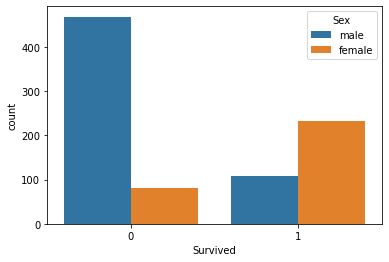

In [20]:
#Male vs Female Survived
sns.countplot(x='Survived', data=titanic_data, hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

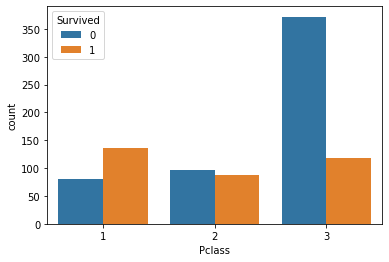

In [21]:
sns.countplot(x='Pclass', data=titanic_data, hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Density'>

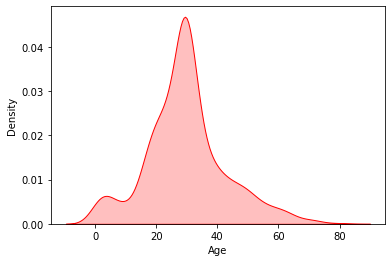

In [22]:
#find the distribution for the age column
sns.kdeplot(titanic_data['Age'] , shade=True , color='r')

**We can see that the plot has peak close to 30. So, we can infer that majority of people on Titanic had Age close to 30.**

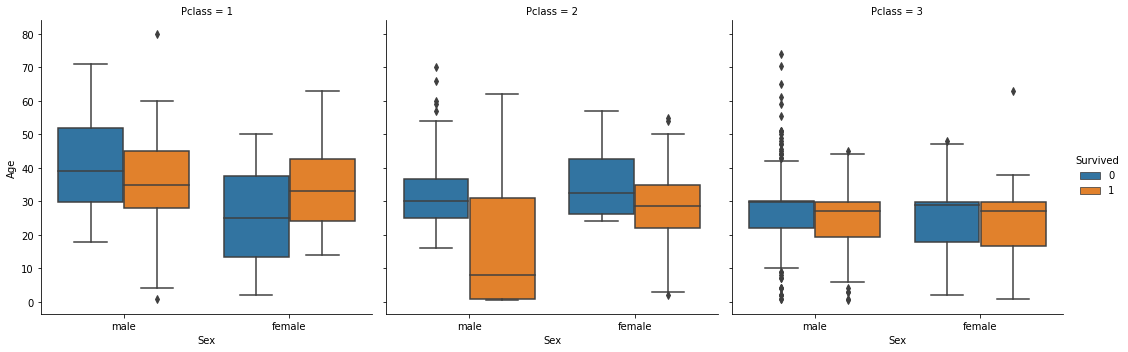

In [23]:
sns.factorplot(x='Sex',y='Age' , col='Pclass', data=titanic_data , hue='Survived' , kind = 'box')

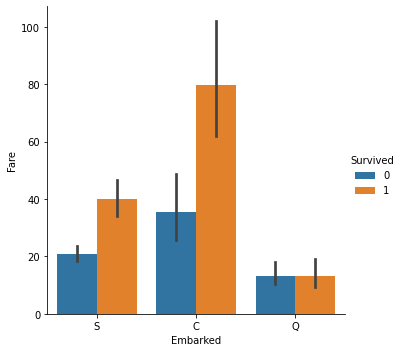

In [24]:
# Survival on the basis of Fare
sns.factorplot(x='Embarked' , y ='Fare' , kind='bar', data=titanic_data , hue='Survived')

**Those who paid high were likely to Survive.**

In [25]:
pd.crosstab([titanic_data['Sex'],titanic_data['Survived']] , [titanic_data['Pclass'],titanic_data['Embarked']] , margins=True)


Pclass            1           2           3           All
Embarked          C  Q    S   C  Q    S   C   Q    S     
Sex    Survived                                          
female 0          1  0    2   0  0    6   8   9   55   81
       1         42  1   48   7  2   61  15  24   33  233
male   0         25  1   51   8  1   82  33  36  231  468
       1         17  0   28   2  0   15  10   3   34  109
All              85  2  129  17  3  164  66  72  353  891

In [26]:
# Survival on the basis of number of Siblings
titanic_data[['SibSp' , 'Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


It seems that there individuals having 1 or 2 siblings/spouses had the highest Probability of Survival, followed by individuals who were Alone.

In [27]:
# Survival on basis of number of Parents/Children.
titanic_data[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


**Looking at Parch and SibSp, we can see that individuals having Family Members had a slightly greater chance of Survival.**

### Encoding the Categorical Columns

In [28]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
# converting categorical columns
titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)

In [31]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Specify features & target

In [32]:
x=titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis = 1)
y=titanic_data['Survived']

In [33]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


### Data Modelling

In [34]:
# splitting data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

In [35]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


**We will 6 models:**

Logistic Regression

k-Nearest Neighbors

Random Forrest

Decision Tree

Gradient Boosting Decision Tree

Naive Bayes classifier

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error

In [37]:
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(),
        DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB()]

model_names=['LogisticRegression','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

accuracy = []
#predictions = []
for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    x_test_prediction = clf.predict(x_test)
    accuracy.append(accuracy_score(x_test_prediction , y_test))
    #predictions.append(clf.predict(x_test))
    best_accuracy = max(accuracy)
    #best_prediction = max(predictions)

compare = pd.DataFrame({'Algorithm' : model_names , 'Accuracy' : accuracy})
compare    

,Algorithm,Accuracy
0,LogisticRegression,0.782123
1,KNearestNeighbors,0.681564
2,RandomForestClassifier,0.798883
3,DecisionTree,0.793296
4,GradientBoostingClassifier,0.793296
5,GaussianNB,0.759777


In [38]:
print("best_accuracy: ", best_accuracy)

best_accuracy:  0.7988826815642458


**we can see RandomForestClassifier Model is giving highest accuracy for our data**

In [39]:
score = []
arr = [50, 100, 150, 200]
for n_estimator_options in arr:
    my_model = RandomForestClassifier(n_estimators = n_estimator_options, 
                                      random_state=0).fit(x_train,y_train)
    my_model.fit(x_train,y_train)
    score.append(my_model.score(x_test,y_test))
compare = pd.DataFrame({'n_estimators' : arr , 'Accuracy' : score})
compare

,n_estimators,Accuracy
0,50,0.810056
1,100,0.804469
2,150,0.810056
3,200,0.815642


In [40]:
final_model = RandomForestClassifier(n_estimators = 200, 
                                      random_state=0).fit(x_train,y_train)
prediction = final_model.predict(x_test)

#### Model Evaluation

Confusion Matrix and Classification Report

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
pd.DataFrame(confusion_matrix(y_test, prediction),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,87,13
Actual Yes,20,59


In [43]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.82      0.75      0.78        79

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179

